In [1]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup


Q1: In this question you have to scrape data using the filters available on the webpage You have to use the location and 
salary filter.  
You have to scrape data for “Data Scientist” designation for first 10 job results.  
You have to scrape the job-title, job-location, company name, experience required.  
The location filter to be used is “Delhi/NCR”. The salary filter to be used is “3-6” lakhs  
The task will be done as shown in the below steps:  
1. first get the web page https://www.naukri.com/ 
2. Enter “Data Scientist” in “Skill, Designations, and Companies” field.  
3. Then click the search button.  
4. Then apply the location filter and salary filter by checking the respective boxes  
5. Then scrape the data for the first 10 jobs results you get.  
6. Finally create a dataframe of the scraped data. 

In [91]:
# Initialize Chrome WebDriver
driver=webdriver.Chrome()
# opening the webpage
driver.get('https://www.naukri.com/')
driver.maximize_window()

In [92]:
#Searching Data Scientist designation
search_skills=driver.find_element(By.XPATH,'/html/body/div[1]/div[7]/div/div/div[1]/div/div/div/div[1]/div/input')
search_skills.send_keys('Data Scientist')
#searching location “Delhi/NCR”
search_location=driver.find_element(By.XPATH,'/html/body/div[1]/div[7]/div/div/div[5]/div/div/div/div[1]/div/input')
search_location.send_keys('Delhi/NCR')
# submiting the key
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[7]/div/div/div[6]')
search.click()
time.sleep(3)
search_salary=driver.find_element(By.XPATH,'/html/body/div/div/main/div[1]/div[1]/div/div/div[2]/div[5]/div[2]/div[2]/label/i')
search_salary.click()

In [95]:

job_title=[]
job_location=[]
company_name=[]

start=0
end=3
T=1

DESIG=driver.find_elements(By.XPATH,'//div[@class=" row1"]/a')
Loc=driver.find_elements(By.XPATH,'//span[@class="loc-wrap ver-line"]')

Name=driver.find_elements(By.CLASS_NAME,"comp-name")




# Check the length of the lists
print(f"Length of DESIG: {len(DESIG)}")
print(f"Length of Loc: {len(Loc)}")
print(f"Length of Name: {len(Name)}")


    
for i in range(len(DESIG)):
      
        if len(DESIG[i].text)>0 and len(Loc[i].text)>0 and len(Name[i].text)>0:
            
            D=DESIG[i].text
            L=Loc[i].text
            N=Name[i].text
        
            job_title.append(D)
            job_location.append(L)
            company_name.append(N)
            
            if len(job_title)>=10:
                break
        
    
df=pd.DataFrame({
    'job_title':job_title,
    'job_location':job_location,
    'company_name':company_name
})

df

#driver.quit()

Length of DESIG: 18
Length of Loc: 18
Length of Name: 18


,job_title,job_location,company_name
0,Data Scientist,"Kolkata, Mumbai, New Delhi, Hyderabad, Pune, C...",Aurigo Software Technologies
1,Data Scientist,"Mumbai, Hyderabad, Pune, Chennai, Gurugram, Be...",WSD Consultant
2,Data Scientist I ( SE - 1 ),New Delhi,Yatra.com
3,Data Scientist,"Gurgaon/Gurugram, Bangalore/Bengaluru",Large Analytics MNC
4,Data Scientist,Delhi / NCR,Hero Fincorp
5,Data Scientist,"Gurugram, Bengaluru",Acenet
6,Sr. Data Science Engineer - Noida/BLR,"Noida, Uttar Pradesh, Bengaluru, Karnataka",Imaginators Try Going Beyond
7,Python Data Scientist,Noida,Buddy4study
8,Data Scientist,Gurugram,Akhil Systems
9,Data scientist,Gurugram,Digital Vidya


Q2: Write a python program to scrape data for “Data Scientist” Job position in “Bangalore” location. You have to scrape the 
job-title, job-location, company_name, experience_required. You have to scrape first 10 jobs data. 
This task will be done in following steps: 
1. First get the webpage https://www.shine.com/ 
2. Enter “Data Analyst” in “Job title, Skills” field and enter “Bangalore” in “enter the location” field. 
3. Then click the searchbutton.  
4. Then scrape the data for the first 10 jobs results you get.  
5. Finally create a dataframe of the scraped data.  


In [99]:
# Initialize Chrome WebDriver
driver1=webdriver.Chrome()
# opening the webpage
driver1.get('https://www.shine.com/')
driver1.maximize_window()
time.sleep(5)


In [100]:
try:
    # Wait for the pop-up to appear
    WebDriverWait(driver1, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/div/div[3]/div/div')))

    # Wait for the close button to be clickable
    close_button = WebDriverWait(driver1, 10).until(
        EC.element_to_be_clickable((By.XPATH, '/html/body/div/div[3]/div/div/button'))
    )

    # Click the close button
    close_button.click()

except Exception as e:
    print("Error occurred:", e)

In [101]:
search_button=driver1.find_element(By.XPATH,'/html/body/div/header/div[3]/div/div/div[1]/div/span/i')
search_button.click()

In [102]:
#Searching Data Scientist designation
search_skills=driver1.find_element(By.XPATH,'/html/body/div/div[4]/div/div[2]/div[2]/div/form/div/div[1]/ul/li[1]/div/input')
search_skills.send_keys('Data Scientist')
#searching location “Delhi/NCR”
search_location=driver1.find_element(By.XPATH,'/html/body/div/div[4]/div/div[2]/div[2]/div/form/div/div[1]/ul/li[2]/div/input')
search_location.send_keys('Bangalore')
# submiting the key
search=driver1.find_element(By.XPATH,'/html/body/div/div[4]/div/div[2]/div[2]/div/form/div/div[2]/div/button')
search.submit()
time.sleep(3)


In [104]:
try:
    # Wait for the pop-up to appear
    WebDriverWait(driver1, 10).until(EC.presence_of_element_located((By.XPATH, '/html/body/div[1]/div[2]/div[1]/div/div')))

    # Wait for the close button to be clickable
    close_button = WebDriverWait(driver1, 10).until(
        EC.element_to_be_clickable((By.XPATH, '/html/body/div[1]/div[2]/div[1]/div/div/button'))
    )

    # Click the close button
    close_button.click()

except Exception as e:
    print("Error occurred:", e)

In [105]:
Job_postion=[]
Job_location=[]
Comp_Name=[]
Experience=[]



pos=driver1.find_elements(By.XPATH,'//strong[@class="jobCard_pReplaceH2__xWmHg"]/a')
Loc=driver1.find_elements(By.XPATH,'//div[@class=" jobCard_jobCard_lists_item__YxRkV jobCard_locationIcon__zrWt2"]')
Com=driver1.find_elements(By.XPATH,'//div[@class="jobCard_jobCard_cName__mYnow"]/span')
Exp=driver1.find_elements(By.XPATH,'//div[@class=" jobCard_jobCard_lists_item__YxRkV jobCard_jobIcon__3FB1t"]')
print(len(pos))
print(len(Loc))
print(len(Com))
print(len(Exp))

for i in range(10):
    p=pos[i].text
    L=Loc[i].text
    C=Com[i].text
    E=Exp[i].text
    
    Job_postion.append(p)
    Job_location.append(L)
    Comp_Name.append(C)
    Experience.append(E)
    
df=pd.DataFrame({
    'Job_postion':Job_postion,
    'Job_location':Job_location,
    'Comp_Name':Comp_Name,
    'Experience':Experience
    
})
    
df


20
20
20
20


,Job_postion,Job_location,Comp_Name,Experience
0,Data Scientist,Bangalore\n+4,alike thoughts solutions private li...,5 to 10 Yrs
1,Data Scientist Urgent Recruitment,Bangalore\n+13,divya staffing solution,0 to 4 Yrs
2,Data Scientist Opening,Bangalore\n+13,divya staffing solution,0 to 4 Yrs
3,Data Scientist Recruitment,Bangalore\n+12,radhika enterprises,0 to 4 Yrs
4,Data Scientist Vacancy,Bangalore\n+13,divya staffing solution,0 to 4 Yrs
5,Hiring For Data Scientist,Bangalore\n+13,divya staffing solution,0 to 4 Yrs
6,Data Scientist Opening,Bangalore\n+15,renuka interprises,0 to 4 Yrs
7,Data Scientist Opening,Bangalore\n+15,renuka interprises,0 to 4 Yrs
8,Data Scientist Recruitment,Bangalore\n+9,radhika enterprises,0 to 4 Yrs
9,ML Data Scientist,Bangalore\n+3,gujarat facility services hiring fo...,5 to 8 Yrs


Q3: Scrape 100 reviews data from flipkart.com for iphone11 phone. You have to go the link: 
https://www.flipkart.com/apple-iphone-11-black-64-gb/product
reviews/itm4e5041ba101fd?pid=MOBFWQ6BXGJCEYNY&lid=LSTMOBFWQ6BXGJCEYNYZXSHRJ&marketplace=F
 LIPKART 
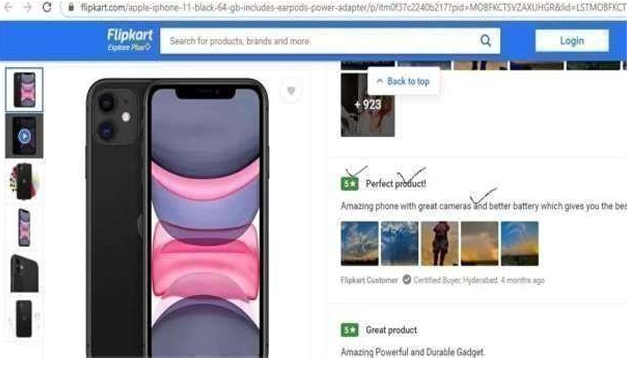
As shown in the above page you have to scrape the tick marked attributes. These are: 
1. Rating 
2. Review summary 
3. Full review 
4. You have to scrape this data for first 100reviews.

In [96]:
driver2=webdriver.Chrome()
driver2.get('https://www.flipkart.com/apple-iphone-11-black-128-gb-includes-earpods-power-adapter/p/itm06bac28995200?pid=MOBFKCTSYAPWYFJ5&lid=LSTMOBFKCTSYAPWYFJ580EM6T&marketplace=FLIPKART&q=iphone11&store=tyy%2F4io&srno=s_1_2&otracker=AS_QueryStore_OrganicAutoSuggest_1_8_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_8_na_na_na&iid=b401bb54-b5d8-463e-b926-bbbbff7acb85.MOBFKCTSYAPWYFJ5.SEARCH&ssid=pc7p01rlu80000001712508875056&qH=d6db477051465f9a')
driver2.maximize_window()

In [97]:
Next_button=driver2.find_element(By.XPATH,'//div[@class="_3UAT2v _16PBlm"]/span')
Next_button.click()
time.sleep(3)

In [63]:
Rating=[]
Review=[]
Comments=[]

#Details=driver2.find_elements(By.XPATH,'//div[@class="col"]/div/div/div[1]')


start=0
end=35
T=1
for page in range (start,end):
    
    Rat=driver2.find_elements(By.XPATH,'//div[@class="_3LWZlK _1BLPMq"]')
    Re=driver2.find_elements(By.XPATH,'//p[@class="_2-N8zT"]')
    Comts=driver2.find_elements(By.XPATH,'//div[@class="t-ZTKy"]/div')
    print(len(Rat),len(Re),len(Comts))
    
    if T<=100:
        for i in range(len(Rat)):
            R=Rat[i].text
            Rv=Re[i].text
            Co=Comts[i].text
            
            Rating.append(R)
            Review.append(Rv)
            Comments.append(Co)
            
            T+=1
        
            if T>100:
                break
        
    #Next_button=driver2.find_element(By.XPATH,'//a[@class="_1LKTO3"]/span')
    #Next_button.click()
    #time.sleep(3)
    
    if T<100:
        next_button = WebDriverWait(driver2, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@class="_1LKTO3"]/span')))
        next_button.click()
        time.sleep(3)  #

   # Store data in a dataframe
Table=pd.DataFrame({
    'Rating':Rating,
    'Review':Review,
    'Comments':Comments
})
Table  # Display Table

10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10
10 10 10


,Rating,Review,Comments
0,5,Excellent,NYC
1,5,Perfect product!,Photos super
2,5,Worth every penny,Feeling awesome after getting the delivery of ...
3,5,Best in the market!,Good Camera
4,5,Wonderful,This is amazing at all
...,...,...,...
95,5,Excellent,NYC
96,5,Fabulous!,It’s very good battery life and display and vi...
97,5,Highly recommended,Awesome Battery Life...Camera clarity is too g...
98,5,Brilliant,Excellent Phone.


Q4: Scrape data for first 100 sneakers you find when you visit flipkart.com and search for “sneakers” in the search 
field. 
You have to scrape 3 attributes of each sneaker: 
1. Brand 
2. Product Description 
3. Price 
As shown in the below image, you have to scrape the above attributes. 

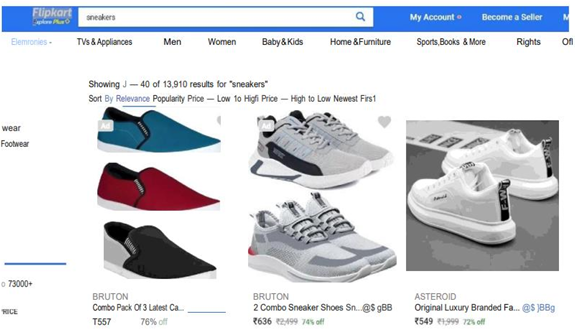

In [94]:
# Initialize WebDriver (assuming Chrome)
driver3=webdriver.Chrome()
driver3.get('https://www.flipkart.com/')
driver3.maximize_window()



In [95]:
# search website

search=driver3.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/div/input')
search.send_keys('sneakers')
search.submit()


In [51]:
Brand=[]
Prod_Descr=[]
Prod_price=[]
T=1
start=0
end=3


for page in range(start,end):
    BR=driver3.find_elements(By.XPATH,'//div[@class="_2WkVRV"]')
    DE=driver3.find_elements(By.XPATH,'//a[@class="IRpwTa" or @class="IRpwTa _2-ICcC"]')
    PR=driver3.find_elements(By.XPATH,'//div[@class="_30jeq3"]')
    print(len(BR),len(DE),len(PR))
    
    if T<=100:
        


        for i in range(len(BR)):
            B=BR[i].text
            D=DE[i].text
            P=PR[i].text

            Brand.append(B)
            Prod_Descr.append(D)
            Prod_price.append(P)
            T+=1

            if T>100:
                break
                
# Locate and click the "Next" button/link
        if T<100:
            Next_Button=driver3.find_element(By.XPATH,'//a[@class="_1LKTO3"]/span')
            Next_Button.click()
            time.sleep(3) # Add a delay to allow the next page to load
       

    # Store data in a dataframe
sneakers=pd.DataFrame({
    'Brand':Brand,
    'Prod_Descr':Prod_Descr,
    'Prod_price':Prod_price
})
sneakers  # Display Table

40 40 40
40 40 40
40 40 40


,Brand,Prod_Descr,Prod_price
0,Deals4you,Sneakers For Women,₹379
1,URBANBOX,Trending Stylish Casual Outdoor Shoes Sneakers...,₹299
2,RED TAPE,Casual Sneakers Shoes for Men | Soft Cushioned...,"₹1,179"
3,ATOM,Alpha Predator Sneakers For Men,"₹1,367"
4,SOLETHREADS REBEL,Sneakers For Women,₹879
...,...,...,...
95,U.S. POLO ASSN.,CLARKIN Sneakers For Men,"₹1,279"
96,RapidBox,Sneakers For Men,₹595
97,Hida,Sneakers For Men,₹584
98,RapidBox,Sneakers For Men,₹595


Q5: Go to webpage https://www.amazon.in/ Enter “Laptop” in the search field and then click the search icon. Then set CPU 
Type filter to “Intel Core i7” as shown in the below image:
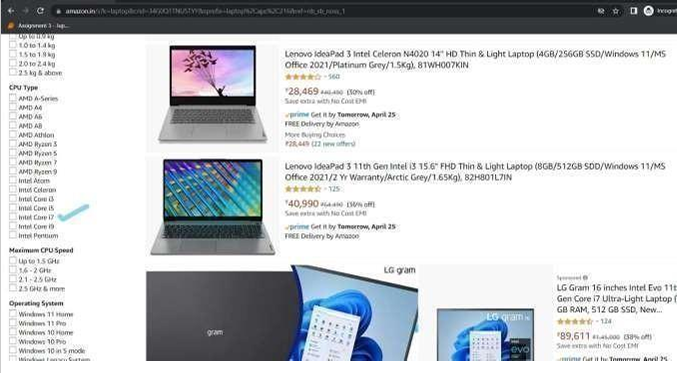
After setting the filters scrape first 10 laptops data. You have to scrape 3 attributes for each laptop: 
1. Title 
2. Ratings 
3. Price 

In [101]:
driver4=webdriver.Chrome()
driver4.get('https://www.amazon.in/')
driver4.maximize_window()
time.sleep(3)
#expand=driver4.find_element(By.XPATH,'/html/body/div[1]/div[1]/div[1]/div[2]/div/div[3]/span/div[1]/div/div/div[1]/span[1]/a')
#expand.click()
time.sleep(3)
search=driver4.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
search.send_keys('Laptop')
search.submit()
time.sleep(3)

i7=driver4.find_element(By.XPATH,'//Li[@id="p_n_feature_thirteen_browse-bin/12598163031"]/span/a/div')
i7.click()
time.sleep(3)

In [20]:
result=driver4.find_elements(By.XPATH,'')


ti=driver4.find_elements(By.XPATH,'//span[@class="a-size-medium a-color-base a-text-normal"]')

#Ra=driver4.find_elements(By.XPATH,'//div[@class="a-section a-spacing-none a-spacing-top-micro"]/div/span/span/a/i/span | //div[@class="a-section a-spacing-none a-spacing-top-micro faceout-product-review"]/div/span/span/a/i/span')
Ra=driver4.find_elements(By.XPATH,'//div[@class="a-row a-size-small"]/span/span/a/i/span | //div[@class="a-section a-spacing-none _bGlmZ_itemInfo_3FzbQ _bGlmZ_singleItemInfo_2XfXJ _bGlmZ_block_1vI8- _bGlmZ_col_358pf"]/a/div/i/span')
Pri=driver4.find_elements(By.XPATH,'//span[@class="a-price-whole"]')
print(len(ti),len(Ra),len(Pri))

for i in range(len(ti)):
    t=ti[i].text
    R=Ra[i].text
    P=Pri[i].text

    print(t)
    print(R.strip(" "))
    print(P)


30 29 30
MSI Modern 14, Intel 12th Gen. i7-1255U, 36CM FHD 60Hz Laptop (16GB/512GB NVMe SSD/Windows 11 Home/Intel Iris Xe Graphics/Classic Black/1.4Kg), C12M-459IN

49,990
MSI Modern 15, Intel 13th Gen. i7-1355U, 40CM FHD 60Hz Laptop (16GB/512GB NVMe SSD/Windows 11 Home/Iris Xe Graphics/Classic Black/1.7Kg), B13M-288IN

65,990
Lenovo IdeaPad Slim 3 Intel Core i7 12th Gen 15.6 inch (39.62cm) FHD Thin & Light Laptop (16GB/512GB SSD/Windows 11/Office 2021/3months Game Pass/Arctic Grey/1.63Kg), 82RK011EIN

62,990
ASUS TUF Gaming F15, 15.6"(39.62 cms) FHD 144Hz, Intel Core i7-11800H 11th Gen, 4GB NVIDIA GeForce RTX 3050 Ti, Gaming Laptop (16GB/512GB SSD/Windows 11/90WHrs Battery/Black/2.30 Kg), FX506HE-HN382W

67,990
Lenovo ThinkBook 15 Intel 12th Gen Core i7 15.6" (39.62cm) FHD IPS 300 Nits Antiglare Thin and Light Laptop (16GB/512GB SSD/Windows 11 Home/Backlit/Mineral Grey/1Y Premier Support/1.7 Kg), 21DJA0Y0IN

59,990
ASUS Vivobook 15, Intel Core i7-12650H 12th Gen, 15.6" (39.62 cm) FHD,

IndexError: list index out of range

Q6: Write a python program to scrape data for Top 1000 Quotes of All Time. 
The above task will be done in following steps: 
1. First get the webpagehttps://www.azquotes.com/ 
2. Click on Top Quote 
3. Than scrap a) Quote b) Author c) Type Of Quotes 
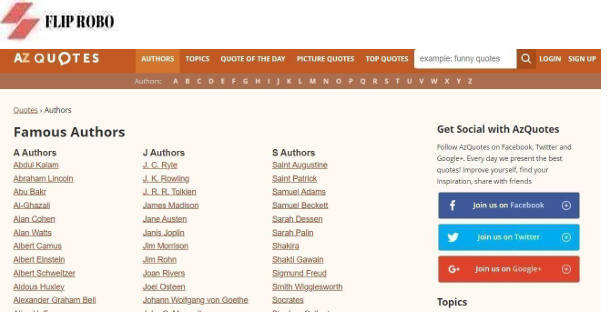

In [101]:
driver5=webdriver.Chrome()
driver5.get('https://www.azquotes.com/')
driver5.maximize_window()
time.sleep(3)
search=driver5.find_element(By.XPATH,'/html/body/div[1]/div[1]/div[1]/div/div[3]/ul/li[5]/a')
search.click()
time.sleep(3)

In [108]:
Quote=[]
Author=[]
Type_Of_Quotes=[]

Qo=driver5.find_elements(By.XPATH,'//a[@class="title"]')
Au=driver5.find_elements(By.XPATH,'//div[@class="author"]/a')
Ty=driver5.find_elements(By.XPATH,'//div[@class="tags"]')

print(len(Qo),len(Au),len(Ty))

for i in range(len(Qo)):
    Q=Qo[i].text
    #print(Q)
    A=Au[i].text
    #print(A)
    T=Ty[i].text
    #print(T)
    
    Quote.append(Q)
    Author.append(A)
    Type_Of_Quotes.append(T)

    
df = pd.DataFrame({
        'Quote': Quote,
        'Author': Author,
        'Type_Of_Quotes': Type_Of_Quotes
    })
df

100 100 100


,Quote,Author,Type_Of_Quotes
0,The essence of strategy is choosing what not t...,Michael Porter,"Essence, Deep Thought, Transcendentalism"
1,One cannot and must not try to erase the past ...,Golda Meir,"Inspiration, Past, Trying"
2,Patriotism means to stand by the country. It d...,Theodore Roosevelt,"Country, Peace, War"
3,Death is something inevitable. When a man has ...,Nelson Mandela,"Inspirational, Motivational, Death"
4,You have to love a nation that celebrates its ...,Erma Bombeck,"4th Of July, Food, Patriotic"
...,...,...,...
95,"When the going gets weird, the weird turn pro.",Hunter S. Thompson,"Music, Sports, Hunting"
96,When a train goes through a tunnel and it gets...,Corrie Ten Boom,"Trust, Encouraging, Uplifting"
97,If you think you are too small to make a diffe...,Dalai Lama,"Inspirational, Funny, Change"
98,"God doesn't require us to succeed, he only req...",Mother Teresa,"Success, God, Mother"


Q7: Write a python program to display list of respected former Prime Ministers of India (i.e. Name, 
Born-Dead, Term of office, Remarks) from https://www.jagranjosh.com/general-knowledge/list-of
all-prime-ministers-of-india-1473165149-1  
scrap the mentioned data and make the DataFrame
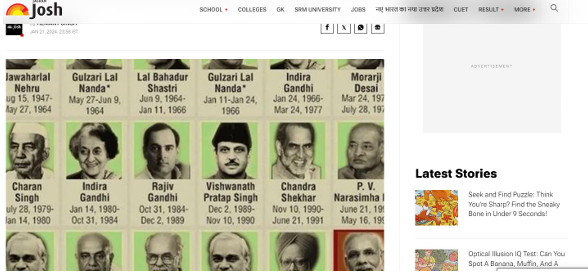

In [23]:
driver6=webdriver.Chrome()
driver6.get('https://www.jagranjosh.com/general-knowledge/list-of%20all-prime-ministers-of-india-1473165149-1')
driver6.maximize_window()
time.sleep(10)


In [48]:
S_No=[]
Name=[]
Life=[]
Tenured_date=[]
Tenured_days=[]
Remarks=[]


Tables = driver6.find_elements(By.XPATH,'//div[@class="TableData"]/table/tbody/tr')
for i in Tables[1:]:
    print(i.text.split('\n'))
    s=i.text[0]
    N=i.text[1]
    L=i.text[2]
    TDT=i.text[3]
    TD=i.text[4]
    R=i.text[5]
    
    S_No.append(s)
    Name.append(N)
    Life.append(L)
    Tenured_date.append(TDT)
    Tenured_days.append(TD)
    Remarks.append(R)
    

d=pd.DataFrame({
    'S_No':S_No,
    'Name':Name,
    'Life':Life,
    'Tenured_date': Tenured_date,
    'Tenured_days':Tenured_days,
    'Remarks':Remarks
    
})
    
    

['1.', 'Jawahar Lal Nehru', '(1889–1964)', '15 August 1947 to 27 May 1964', '16 years, 286 days', 'The first prime minister of India and the longest-serving PM of India, the first to die in office.']
['2.', 'Gulzarilal Nanda (Acting)', '(1898-1998)', '27 May 1964 to 9 June 1964,', '13 days', 'First acting PM of India']
['3.', 'Lal Bahadur Shastri', '(1904–1966)', '9 June 1964 to 11 January 1966', '1 year, 216 days', "He has given the slogan of 'Jai Jawan Jai Kisan' during the Indo-Pak war of 1965"]
['4. ', 'Gulzari Lal Nanda  (Acting)', '(1898-1998)', '11 January 1966 to 24 January 1966', '13 days', '-']
['5.', 'Indira Gandhi', '(1917–1984)', '24 January 1966 to 24 March 1977', '11 years, 59 days', 'First female Prime Minister of India']
['6.', 'Morarji Desai', '(1896–1995)', '24 March 1977 to  28 July 1979 ', '2 year, 126 days', 'Oldest to become PM (81 years old) and first to resign from office']
['7.', 'Charan Singh', '(1902–1987)', '28 July 1979 to 14 January 1980', '170 days', 'On

This task will be done in following steps: 
1. First get the webpage https://www.motor1.com/ 
2. Then You have to type in the search bar ’50 most expensive cars’ 
3. Then click on 50 most expensive cars in the world.. 
4. Then scrap the mentioned data and make the dataframe.
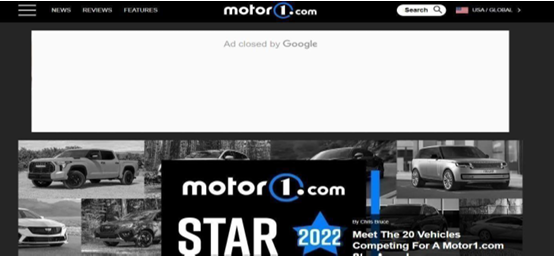

In [49]:
# Step 1: Get the webpage
driver7 = webdriver.Chrome() 
driver7.get('https://www.motor1.com/')
driver7.maximize_window()

time.sleep(3)

# Step 2: Type in the search bar
search_bar = driver7.find_element(By.XPATH,'/html/body/div[9]/div[2]/div/div/div[3]/div/div/div/form/input')

search_bar.send_keys('50 most expensive cars')
search_bar.submit()
time.sleep(3)


# Step 3: Click on the link
link = driver7.find_element(By.XPATH,'/html/body/div[9]/div[9]/div/div[1]/div/div/div[1]/div/div[1]/h3/a')
link.click()
time.sleep(3)

# Step 4: Scrape the data and create a dataframe
car_names = driver7.find_elements(By.CLASS_NAME,'arrow-heading')
#('//div[@class="article-content"]/h3')
car_prices = driver7.find_elements(By.XPATH,'//div[@class="article-content"]/p')
data = []
for name, price in zip(car_names, car_prices):
    data.append([name.text, price.text])

df = pd.DataFrame(data, columns=['Car Name', 'Price'])
print(df)



Empty DataFrame
Columns: [Car Name, Price]
Index: []
